# Simple Least Squares
**Further Reading:** §7.2 Navidi (2015)

## Learning Objectives

After studying this notebook and your lecture notes, you should be able to:
* Understand how to calculate a best fit line numerically or analytically.
* Implement scipy to calculate a line of best fit.
* Know when the least squares line is applicable.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Introduction

variable | symbol
:-: | :-:
dependent variable | $y_i$
independent variable | $x_i$
regression coefficients | $\beta_0$ , $\beta_1$
random error | \varepsilon_i$

**Linear model:**

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$

We measure many $(x_i,y_i$ pairs in lab.

Can we compute $\beta_0$ , $\beta_1$ exactly?  Why or why not?

**Best fit line:**

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

where $\hat{y}$ is the predicted response and $\beta_0$ , $\beta_1$ are the fitted coefficients.

## Computing Best Fit Line

$$\min_{\beta_0 , \beta_1} \sum_{i=1}^n (y_i - \hat{y_i})^2$$

$$\textrm{(residual) } e_i = y_i - \hat{y_i}$$

Notice inside the parenthesis we have the sum of the error squared.

We can compute $\beta_0$ , $\beta_1$ either *numerically* or *analytically*.   See the textbook for the full derivation.

$$\hat{\beta_1} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) = \frac{s_{x,y}}{s_x^2} = r\frac{s_y}{s_x}$$

$$(s_{x,y} \textrm{ is sample covariance, }s \textrm{ is sample variance})$$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$$

Scipy also computes best fit as we will see in the example below.

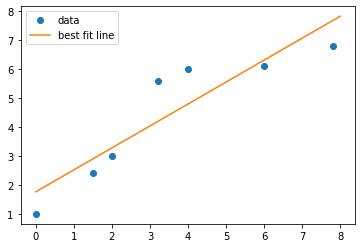

In [107]:
# create data
xdata = [0,1.5,2,3.2,4,6,7.8]
ydata = [1,2.4,3,5.6,6,6.1,6.8]

# use scipy.stats.linregress to calculate a line of best fit and extract the key info
slope, intercept, r, p, se = stats.linregress(xdata,ydata)

# create a lambda function to plot the line of best fit
xline = np.linspace(0,8,10)
y = lambda x: slope*x + intercept
yline = y(xline)

# plot data
plt.plot(xdata,ydata,'o',label="data")
plt.plot(xline,yline,'-',label="best fit line")
plt.legend()
plt.show()

## Warnings:

* Estimates $\beta_0$ , $\beta_1$ are not the same as true values. $\beta_0$ , $\beta_1$ are random variables because of measurement error.
* The residuals $e_i$ are not the same as error $\epsilon_i$.

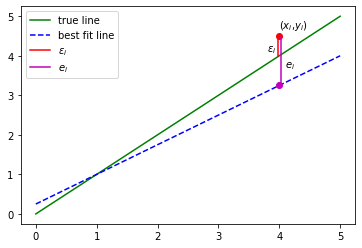

In [70]:
x1 = [0,5]
y1 = [0,5]

x2 = [0,5]
y2 = [0.25,4]

xpoint1 = 4
ypoint1 = 4.5

xpoint2 = 4
ypoint2 = 3.25

xline1 = [3.98,3.98]
yline1 = [4,4.5]

xline2 = [4.02,4.02]
yline2 = [3.25,4.5]

plt.plot(x1,y1,'g',label="true line")
plt.plot(x2,y2,'b--',label="best fit line")
plt.plot(xpoint1,ypoint1,'ro')
plt.plot(xline1,yline1,'r',label="$\epsilon_i$")
plt.plot(xpoint2,ypoint2,'mo')
plt.plot(xline2,yline2,'m',label="$e_i$")
plt.text(4,4.7,'($x_i$,$y_i$)')
plt.text(3.8,4.1,'$\epsilon_i$')
plt.text(4.1,3.7,'$e_i$')
plt.legend()
plt.show()

* Do NOT extrapolate outside the range of the data.
* Do NOT use the least-squares line when the data are not **linear**.


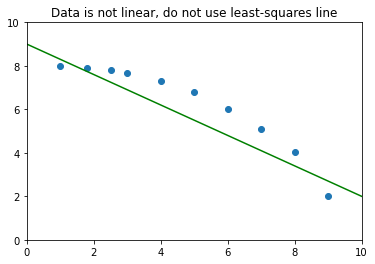

In [94]:
xpts = [1,1.8,2.5,3,4,5,6,7,8,9]
ypts = [8,7.9,7.8,7.65,7.3,6.8,6,5.1,4.05,2]

xline = [0,10]
yline = [9,2]

plt.plot(xpts,ypts,'o')
plt.plot(xline,yline,'g')
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Data is not linear, do not use least-squares line')
plt.show()

## Measuring Goodness-of-Fit

How well does the model explain the data?

**Coefficient of determination:**

$$r^2 = \frac{\sum_{i=1}^n (y_i - \bar{y})^2 - \sum_{i=1}^n (y_i - \hat{y_i})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

$$ = \frac{\textrm{regression sum of squares}}{\textrm{total sum of squares}}$$

Interpretation: proportion of the variance in $y$ explained by regression.

See the textbook for the derivation of the $r^2$ formula.